### Table of Contents
- 1. [Introduction](#section1)<br>
    - 1.1 [Data Set Description](#section11)<br>
    - 1.2 [Bussiness Understanding](#section12)<br>
- 2. [Bussiness Objective](#section2)<br>
- 3. [Project Approch](#section3)<br>
- 4. [Importing Libraries and Packages](#section4)<br>
- 5. [Creating Custom Functions](#section5)<br>
- 6. [Data Loading](#section6)<br>
- 7. [Data Description](#section7)<br>
    - 7.1 [Observations](#section71)<br>
- 8. [Data Cleaning](#section8)<br>
   - 8.1 [Missing Values](#section81)<br>
      - 8.1.1 [Observations](#section811)<br>
   - 8.2 [Examine Balance Columns](#section82)<br>
       - 8.2.1 [Employee Title](#section821)<br>
       - 8.2.2 [Employee Length](#section822)<br>
       - 8.2.3 [Description](#section823)<br>
       - 8.2.4 [Title](#section824)<br>
       - 8.2.5 [Revolving Credit Utilisation](#section825)<br>
       - 8.2.6 [Last Payment Date](#section826)<br>
       - 8.2.7 [Last Credit Pull Date](#section827)<br>
       - 8.2.8 [Collections Last 12 Months](#section828)<br>
       - 8.2.9 [Charge Off in LAst 12 Months](#section829)<br>
       - 8.2.10 [Public Recorded Bankruptcies](#section8210)<br>
       - 8.2.11 [Tax Liens](#section8211)<br>
   - 8.3 [Dropping Columns and Rows with Missing Values](#section84)<br>
- 9. [Unique Values](#section9)<br>
- 10. [Dealing with Redundant Data](#section10)<br>
- 11. [Dealing with Dates](#section11)<br>
- 12. [Correcting Data Types](#section12)<br>
- 13. [Outlier Detection and Removal](#section13)<br>
- 14. [Creating Bins for Contionus Data](#section14)<br>
- 15. [Analysing Each Col for Discripencies](#section15)<br>
  - 15.1 [Column Analysis](#section151)<br>
  - 15.2 [Distribution of Column Values](#section152)<br>
    - 15.2.1 [Data Distribution Part - I](#section1521)<br>
    - 15.2.2 [Data Distribution Part - II](#section1522)<br>
    - 15.2.3 [Data Distribution Part - III](#section1523)<br>
- 16. [Univariate Analysis](#section16)<br>
  - 16.1 [Analysis of Variables aganist Loan Status](#section161)<br>
  - 16.2 [Univariate Analysis aganist Deafaulted Loan Percentage](#section162)<br>
- 17. [Bivariate Analysis](#section17)<br>
- 18. [Conclusion](#section18)<br>
  - 18.1 [Summary](#section181)<br>
  - 18.2 [Recommendations](#section182)<br>
- 19. [Acknowlegement](#section19)<br>

### 1 Intoduction<a class="anchor" id="section1"></a>

### 1.1 Data Set Description<a class="anchor" id="section11"></a>

- **Lending Club** is a comapny that provides loan and based in USA. Many of the loans are funded by investors in a peer to peer lending model.
- Data contains data regarding loan applicants and their repayment behaviour.
- This enables the Lending Company to understand if the customer is likely to pay back the loan as intended or default on the loan.
- Accompanying excel "Data Dictinoary" gives breif description of all the variables in the data set.

### 1.2 Business Understanding<a class="anchor" id="section12"></a>
- Every loan applicant pose two type of risk:
  - **NOT APPROVING** loan to a customer who is likely to pay back : Results in loss of bussiness.
  - **APPROVING** loan to custome likely to default: Financial loss to company.

- The analysis of customer's behaviour pattern regarding loan repayment along with other financial data will enable the company to decide on provision of loan.


## 2. Bussiness Objective<a class="anchor" id="section2"></a>

- Carry out Exploratory Data Analysis (EDA) of the given data set  to understand factors that tendency of default on the loan repayment.

## 3. Project Approach<a class="anchor" id="section3"></a>
- The project shall be carried out in the steps enumerated below. 
  - Data Cleaning
    - Dealing with missing variables
    - Dealing with column names.
    - Dealing with data types of variables.
    - Outlier detection
      - Identifying outliers
      - Managing outliers
- Univariate Analysis
- Bivariate Analysis   
- Conclusion
  - Summary
  - Recommendation

### 4. Importing Libraries and Fucntions<a class="anchor" id="section4"></a>

In [1]:
# Pandas and Numpy
import pandas as pd
import numpy as np
import datetime as dt
import os

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting display option for float to show just two digits after decimal points.
# This makes data more readable without changing the undelying value
pd.options.display.float_format = '{:,.2f}'.format

### 5. Creating Custom Functions<a class="anchor" id="section5"></a>
- These functions have been created to ease of use in this notebook.


In [3]:
# This function will retun a data frame with missing values and its percentage

def missing_data(data):
    total = data.isna().sum()[data.isna().sum() != 0]
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    if [missing_df['Total'] == 0]:
        missing_df.dropna(axis=0, inplace = True)
    return missing_df
        

In [4]:
# Function to check the unique values in a col as well as display value counts.
def col_check(x,colname):
  print("Number of unique values are : ", x[colname].nunique(), '\n')
  print("Value Counts", '\n', x[colname].value_counts(),'\n')
  numbers = x[colname].isnull().sum()
  missing_percent = (x[colname].isnull().sum()/len(x[colname])*100)
  print('Number of unique of value in {} is {} & percentage is {} %'.format(colname, numbers, round(missing_percent,3)))
  return 


In [5]:
# Dropping cols with missing values.
# Drops single column at at time and display details
def drop_col(x,colname):
  print("Shape of original dataframe: ", loan_1.shape)
  cols_before_delete = x.shape[1]
  print('Shape of dataframe loan_2 before deleting col with missing values in {} is {}: '.format(colname,x.shape))
  x.drop([colname],axis=1, inplace = True)
  cols_after_delete = x.shape[1]
  print("Shape of loan_2 after deleting rows with missing values in {} is {}: ".format("desc",x.shape))
  print("Number of columns deleted are :", cols_before_delete -cols_after_delete )
  return

In [6]:
# Dropping rows with missing avalues.
# Drops select rows and dispalys count of rows before and after delete
def drop_rows(x,colname):
  print("Shape of original dataframe: ", loan_1.shape)
  rows_before_delete = x.shape[0]
  print('Shape of dataframe loan_2 before deleting rows with missing values in {} is {}: '.format(colname,x.shape))
  x.dropna(subset=[colname], inplace = True)
  rows_after_delete = x.shape[0]
  print("Shape of loan_2 after deleting rows with missing values in {} is {}: ".format(colname,x.shape))
  print("Number of rows deleted are :", rows_before_delete -rows_after_delete )
  return 

In [10]:
def univariate_bar_plot_1(var, data, figsize=(10,5)):
  plt.figure(figsize=figsize)
  var_dia = sorted(data[var].unique())
  var_values = []
  for v in var_dia:
    var_filter = data[data[var]==v]
    var_count = len(var_filter[var_filter["loan_status"]==0])
    var_values.append(var_count*100/var_filter["loan_status"].count())
  plt.bar(var_dia, var_values, color='purple', edgecolor='orange')
  plt.title("Loan Defaults aganist "+str(var)+" feature")
  plt.xlabel(var, fontsize=14)
  plt.ylabel("% of Default", fontsize=14)
  plt.show()
  plt.show()
    

### 6 Data Loading<a class="anchor" id="section6"></a>
- The dataset of analysis named `loan.csv` is provided by UpGrad.
- Data file is uploaded on the GitHub Repository.
- The path to GitHub file is then used to load Data
- The primary dataframe containing unmodified data is named `loan_1'.
- Subsequent data frames that are modifed or created as a subset will be named appropriately.

In [11]:
#Load data
loan_1 =pd.read_csv('https://raw.githubusercontent.com/JoeJacob2755/Lending_Club_Case_Study/master/loan.csv')
loan_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


## 7. Data Description<a class="anchor" id="section7"></a>
- Describe data
- Understand the basic layout of variables
- Understand the statistical description of data

In [12]:
loan_1.shape

(39717, 111)

In [13]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [14]:
loan_1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"39,717.00","683,131.91","210,694.13","54,734.00","516,221.00","665,665.00","837,755.00","1,077,501.00"
member_id,"39,717.00","850,463.56","265,678.31","70,699.00","666,780.00","850,812.00","1,047,339.00","1,314,167.00"
loan_amnt,"39,717.00","11,219.44","7,456.67",500.00,"5,500.00","10,000.00","15,000.00","35,000.00"
funded_amnt,"39,717.00","10,947.71","7,187.24",500.00,"5,400.00","9,600.00","15,000.00","35,000.00"
funded_amnt_inv,"39,717.00","10,397.45","7,128.45",0.00,"5,000.00","8,975.00","14,400.00","35,000.00"
...,...,...,...,...,...,...,...,...
tax_liens,"39,678.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
tot_hi_cred_lim,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 7.1 Observations<a class="anchor" id="section71"></a>
- The initial data set has 39717 and 11 rows
- There seems to be large no of missing values with the amount of NaN values in describe.
- There are 24 categorigal fields and 87 numeric fields


### 8. Data Cleaning<a class="anchor" id="section8"></a>
- Data cleaning will be done in the following manner.
  - Deal with missing values
    - Delete rows and columns with large count of missing values.
    - Impute data where biases will not be created during analysis.
  - Unique values
    - Delete columns with only one value as it will not help in analysis
  - Redudant Data
    - Data that is redudndant amy include the following
      - Identity variables like name, member_id etc
      - Data with similar values or high correlation
      - Data which is not usable due to its inherent nature.
      - Dates which does not give any insight
  - Dealing with data types
    - Dates which are in int or object dtypes
    - Numerical values with characters as suffix and prefix 
  - Column Names: Rename to make it more understandable
  - Standardize Values
    - Encode Categories
    - Correct precision of numerical values
    


### 8.1 Missing Values<a class="anchor" id="section8.1"></a>
- Check for columns with more than 40% missing values and delete them
- Check for rows with more than 40% missing values and delete them
- Check balance colums with missing values and decide on apppropriatesolution
  - Delete rows/columns
  - Impute values suitablly

In [15]:
# Identify missing data using function "missing_data"
missing_data(loan_1)

,Total,Percent
emp_title,"2,459.00",6.19
emp_length,"1,075.00",2.71
desc,"12,940.00",32.58
title,11.00,0.03
mths_since_last_delinq,"25,682.00",64.66
...,...,...
tax_liens,39.00,0.10
tot_hi_cred_lim,"39,717.00",100.00
total_bal_ex_mort,"39,717.00",100.00
total_bc_limit,"39,717.00",100.00


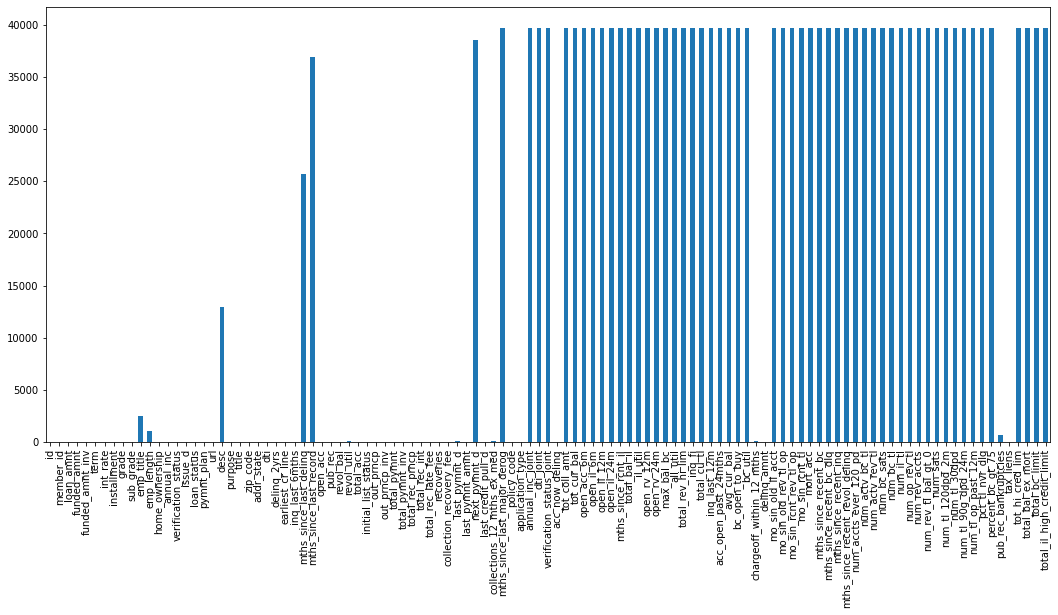

In [16]:
# Visualizing missing data
plt.figure(figsize=(18,8))
loan_1.isnull().sum().plot.bar()
plt.show()

In [17]:
# Identifying columns with more than 40% missing values
drop_cols = (loan_1.isnull().sum()/len(loan_1))          # Create a series 'drop_cols' containing percentage of missing values
drop_cols = list(drop_cols[drop_cols.values>=.4].index)  # Identify the columns with more than 40% missing values and create a list.
print("No of cols to be dropped :",len(drop_cols))                                    # Of the 68 columns with missing rows, 57 have more than 40% missing
print(drop_cols)

No of cols to be dropped : 57
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'p

In [18]:
# Drop columns with more than 40% missing columns
# Create a new dataframe "loan_2" after deleting the columns with missing value more than 40%
loan_2 = loan_1.drop(labels = drop_cols,axis =1)     
loan_2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [19]:
# Dealing with balance of 11 columns with missing values
missing_data(loan_2)

,Total,Percent
emp_title,"2,459.00",6.19
emp_length,"1,075.00",2.71
desc,"12,940.00",32.58
title,11.00,0.03
revol_util,50.00,0.13
last_pymnt_d,71.00,0.18
last_credit_pull_d,2.00,0.01
collections_12_mths_ex_med,56.00,0.14
chargeoff_within_12_mths,56.00,0.14
pub_rec_bankruptcies,697.00,1.75


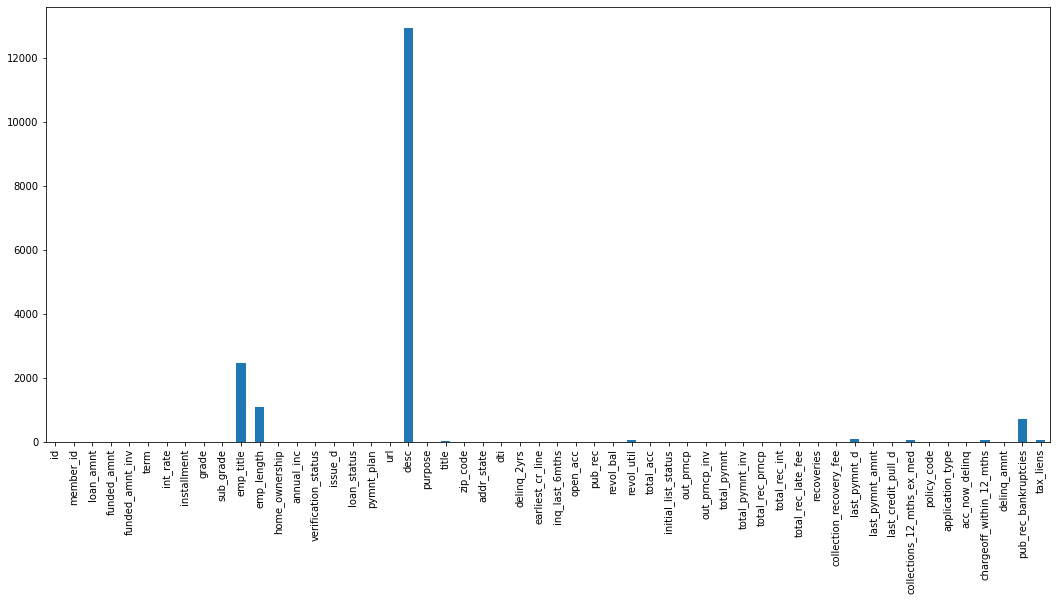

In [20]:
# Visualizing missing data
plt.figure(figsize=(18,8))
loan_2.isnull().sum().plot.bar()
plt.show()

#### 8.1.1 Observation & Actions<a class="anchor" id="section811"></a>
- Observations
  - Total of 68 columns has missing values
  - 57 colums have more than 40% values missing.
- Actions
  - Visualize data with missing colums for better understanding
  - Delete all columns with more than 40 % missing values
  - Derive a new data frame **loan_2** after deleting 57 missing columns
  - Use "loan_2" for further actions



#### 8.2 Examine Balance Colums with Missing Values<a class="anchor" id="section82"></a>
- Use custom functions to check on rows and drop rows & columns
- Examine each colun with missing data
- Decide to drop either the entire column or rows with missing values

#### 8.2.1 **emp_title**<a class="anchor" id="section821"></a>
- Observation
  - There are 28820 unique values corresponding to the title of the applicants
  - Missing Values: 2459 , 6.1 %
  - This data is of no use as it is not categoised into employee title by domain or level.
- Action
  - Delete the column

In [21]:
col_check(loan_2,'emp_title')

Number of unique values are :  28820 

Value Counts 
 US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64 

Number of unique of value in emp_title is 2459 & percentage is 6.191 %


### 8.2.2 **emp_length**<a class="anchor" id="section822"></a>
- Observation
  - Data contains duration for the employment of the applicant
  - There are 11 unique values corresponding to the title of the applicants
  - Missing Values: 1075 , 2.7 %
  - Data is unique to individuals and hence imputing will create bias.
  - Require futher data handling
- Action
  - Delete the rows with missing values.

In [22]:
col_check(loan_2,'emp_length')

Number of unique values are :  11 

Value Counts 
 10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64 

Number of unique of value in emp_length is 1075 & percentage is 2.707 %


### 8.2.3 **Description (desc)**<a class="anchor" id="section823"></a>
- Observation
  - Data contains description about need for loan by applicant
  - There are 126257 unique values corresponding to description
  - Missing Values:12940 , 32.5 %
  - Large quantity of missing values and descriptive content not suitable for analysis
- Action
  - Delete the column.

In [23]:
col_check(loan_2,'desc')

Number of unique values are :  26527 

Value Counts 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               210
Debt Consolidation                                                                                                                                                                                                                                                                              

### 8.2.4 **title**<a class="anchor" id="section824"></a>
- Observation
  - Data contains short version of loan requiremnt by th eapplicant
  - There are 19615 unique values corresponding to title
  - Missing Values: 11 , 0.028 %
  - Imputing personalised requirment will not aid in analysis
- Action
  - Delete the rows with missing values.

In [24]:
col_check(loan_2,'title')

Number of unique values are :  19615 

Value Counts 
 Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64 

Number of unique of value in title is 11 & percentage is 0.028 %


### 8.2.5 **revol_util**<a class="anchor" id="section825"></a>
- Observation
  - Data contains the percentage of revolving credit utilisation by the applicant
  - There are 1089 unique values corresponding to title
  - Missing Values: 50 , 0.126 %
  - Imputing values is difficult as there is a wide variance in the utilisation of credit depending upon the need and other factors.
- Action
  - Delete the rows with missing values.

In [25]:
col_check(loan_2,'revol_util')

Number of unique values are :  1089 

Value Counts 
 0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64 

Number of unique of value in revol_util is 50 & percentage is 0.126 %


### 8.2.6 **Last Payment Date**<a class="anchor" id="section826"></a>
- Observation
  - Data contains the last month payment was received
  - There are 101 unique values corresponding to last payment dates
  - Missing Values: 71 , 0.179 %
  - This data is not usable and will aid in this analysis
- Action
  - Delete the rows with missing values.

In [26]:
col_check(loan_2,'last_pymnt_d')

Number of unique values are :  101 

Value Counts 
 May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64 

Number of unique of value in last_pymnt_d is 71 & percentage is 0.179 %


### 8.2.7 **Last Credit Pull Date**<a class="anchor" id="section827"></a>
- Observation
  - Data contains the last month credit was pulled
  - There are 106 unique values corresponding to last payment dates
  - Missing Values: 2 , 0.005 %
  - This data is not usable and will NOT aid in this analysis
- Action
  - Delete the column with missing values.

In [27]:
col_check(loan_2,'last_credit_pull_d')

Number of unique values are :  106 

Value Counts 
 May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64 

Number of unique of value in last_credit_pull_d is 2 & percentage is 0.005 %


### 8.2.8 **collections_12_mths_ex_med**<a class="anchor" id="section828"></a>
- Observation
  - Data contains collections in the last 12 months excluding medical
  - There is 1 unique value 
  - Missing Values: 2 , 0.005 %
  - This data is not usable as it contains only one unique value and will NOT aid in this analysis
- Action
  - Delete the column.

In [28]:
col_check(loan_2,'last_credit_pull_d')

Number of unique values are :  106 

Value Counts 
 May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64 

Number of unique of value in last_credit_pull_d is 2 & percentage is 0.005 %


### 8.2.9 **Chargeoff in Last 12 Months**<a class="anchor" id="section829"></a>
- Observation
  - Data contains loans charged off in the last 12 months
  - There is 1 unique value 
  - Missing Values: 56, 0.141 %
  - This data is not usable as it contains only one unique value and will NOT aid in this analysis
- Action
  - Delete the column.

In [29]:
col_check(loan_2,'chargeoff_within_12_mths')

Number of unique values are :  1 

Value Counts 
 0.00    39661
Name: chargeoff_within_12_mths, dtype: int64 

Number of unique of value in chargeoff_within_12_mths is 56 & percentage is 0.141 %


### 8.2.10 **Publical Recorded Bankruptcies**<a class="anchor" id="section8210"></a>
- Observation
  - Data contains record any publicly known bankuptcies of the applicant
  - There is 3 unique value 
  - Missing Values: 697, 1.755 %
  - This data cannot be imputed as it is related to each individual
- Action
  - Delete the rows with missing values.

In [30]:
col_check(loan_2,'pub_rec_bankruptcies')

Number of unique values are :  3 

Value Counts 
 0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64 

Number of unique of value in pub_rec_bankruptcies is 697 & percentage is 1.755 %


### 8.2.11 **Tax Liens**<a class="anchor" id="section8211"></a>
- Observation
  - Data contains record any publicly known bankuptcies of the applicant
  - There is 1 unique value 
  - Missing Values: 39, .098 %
  - This data is not usable as it has only one value
- Action
  - Delete the column.


In [31]:
col_check(loan_2,'tax_liens')

Number of unique values are :  1 

Value Counts 
 0.00    39678
Name: tax_liens, dtype: int64 

Number of unique of value in tax_liens is 39 & percentage is 0.098 %


#### 8.3 Drop Columns and Rows<a class="anchor" id="section83"></a>
- **drop_col & drop_row**, customised functions are used for dropping of cols and rows.


In [32]:
drop_col(loan_2,'emp_title')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting col with missing values in emp_title is (39717, 54): 
Shape of loan_2 after deleting rows with missing values in desc is (39717, 53): 
Number of columns deleted are : 1


In [33]:
drop_col(loan_2,'desc')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting col with missing values in desc is (39717, 53): 
Shape of loan_2 after deleting rows with missing values in desc is (39717, 52): 
Number of columns deleted are : 1


In [34]:
drop_col(loan_2,'collections_12_mths_ex_med')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting col with missing values in collections_12_mths_ex_med is (39717, 52): 
Shape of loan_2 after deleting rows with missing values in desc is (39717, 51): 
Number of columns deleted are : 1


In [35]:
drop_col(loan_2,'chargeoff_within_12_mths')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting col with missing values in chargeoff_within_12_mths is (39717, 51): 
Shape of loan_2 after deleting rows with missing values in desc is (39717, 50): 
Number of columns deleted are : 1


- **Rows with missing values**

In [36]:
drop_rows(loan_2,'last_pymnt_d')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting rows with missing values in last_pymnt_d is (39717, 50): 
Shape of loan_2 after deleting rows with missing values in last_pymnt_d is (39646, 50): 
Number of rows deleted are : 71


In [37]:
drop_rows(loan_2,'emp_length')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting rows with missing values in emp_length is (39646, 50): 
Shape of loan_2 after deleting rows with missing values in emp_length is (38576, 50): 
Number of rows deleted are : 1070


In [38]:
drop_rows(loan_2,'title')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting rows with missing values in title is (38576, 50): 
Shape of loan_2 after deleting rows with missing values in title is (38566, 50): 
Number of rows deleted are : 10


In [39]:
drop_rows(loan_2,'revol_util')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting rows with missing values in revol_util is (38566, 50): 
Shape of loan_2 after deleting rows with missing values in revol_util is (38523, 50): 
Number of rows deleted are : 43


In [40]:
drop_rows(loan_2,'last_credit_pull_d')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting rows with missing values in last_credit_pull_d is (38523, 50): 
Shape of loan_2 after deleting rows with missing values in last_credit_pull_d is (38521, 50): 
Number of rows deleted are : 2


In [41]:
drop_rows(loan_2,'pub_rec_bankruptcies')

Shape of original dataframe:  (39717, 111)
Shape of dataframe loan_2 before deleting rows with missing values in pub_rec_bankruptcies is (38521, 50): 
Shape of loan_2 after deleting rows with missing values in pub_rec_bankruptcies is (37825, 50): 
Number of rows deleted are : 696


In [42]:
# Check the shape after deleting rows and colums with missing values
print("initial rows    :",  loan_1.shape[0])
print('initial columns :',  loan_1.shape[1])
print("\n")
print("current rows    :",  loan_2.shape[0])
print('current columns :',  loan_2.shape[1])
print("\n")
print("deleted rows    :",  loan_1.shape[0] - loan_2.shape[0]) 
print('deleted columns :',  loan_1.shape[1] - loan_2.shape[1])
print("\n")
print("deleted rows    :", round(((loan_1.shape[0] - loan_2.shape[0])/loan_1.shape[0])*100),2)
print('deleted columns :', round(((loan_1.shape[1] - loan_2.shape[1])/loan_1.shape[1])*100),2)

initial rows    : 39717
initial columns : 111


current rows    : 37825
current columns : 50


deleted rows    : 1892
deleted columns : 61


deleted rows    : 5 2
deleted columns : 55 2


### 9 **Unique Values**<a class="anchor" id="section9"></a>
- Having a single unique value in a column does not aid the analysis and hence they need to be dropped.
- This is so because the impact of single value in a variable will be same on the entire data set. 
- While it may help in some particualr cases as to see reason behind such variable, its not useful for current analysis.


In [43]:
# Finding columns with unique value = 1
# There are seven 
print("Count of current columns :", loan_2.shape[1],"\n")
drop_cols = [c for c
             in list(loan_2)
             if loan_2[c].nunique() <= 1]
print("Name of columns to be dropped :")
print(drop_cols)
loan_2 = loan_2.drop(columns=drop_cols)
print("Count of columns dropped :",loan_2.shape[1])

Count of current columns : 50 

Name of columns to be dropped :
['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 'tax_liens']
Count of columns dropped : 43


### 10 **Deleting Redundant Data**<a class="anchor" id="section10"></a>
- Identity variable
- Columns and rows that does not contribute to the analyis.
  - These can be identified through domain experts.
  - In this case the pre assignment session hepled in identifying the columns and rows which are not useful for the analysis

In [44]:
# Delete Identity Variab
# zip Codes can be useful in some cases, however we also have addr_state which with corresponding data
loan_2 = loan_2.drop(['id','member_id','url','zip_code'], axis = 1)

In [45]:
loan_2.drop('title', axis = 1, inplace = True)

In [47]:
# Removing redudndant columns.
# Most columns contain behaviour of applicants post loan issue and hence not useful
remove_cols =['funded_amnt','delinq_2yrs','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
              'total_rec_prncp','total_rec_int','total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_2.drop(remove_cols, axis = 1, inplace= True)     

#### 11 **Dealing with dates**<a class="anchor" id="section11"></a>
- Two date columns, **issue_d** & **earliest_cr_line**
- Convert date col from object to datetime
- Extract month and year from issue_d for further analysis
- It seems only year from earliest_cr_line is of significance now as it is historical data.

In [48]:
loan_2['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39562    Nov-07
39573    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 37825, dtype: object

In [49]:
loan_2['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39562    Mar-00
39573    Feb-89
39623    Aug-97
39666    Nov-92
39680    Jul-00
Name: earliest_cr_line, Length: 37825, dtype: object

In [50]:
from datetime import datetime

In [51]:
# Convert date to dattime format from object

loan_2['issue_d'] = pd.to_datetime(loan_2.issue_d, format='%b-%y')
loan_2['earliest_cr_line'] = pd.to_datetime(loan_2.earliest_cr_line, format='%b-%y')

# correcting the mistaken identification of century for the years post 2020
loan_2['earliest_cr_line'] = loan_2['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [52]:
# Extracting year for the earliest cr line.
loan_2['earliest_cr_line'] =loan_2['earliest_cr_line'].dt.year

In [53]:
loan_2['earliest_cr_line'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1973, 1979, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 1968, 1974, 1967, 1965, 1963,
       1966, 1964, 1962, 1956, 1946, 1950, 1954])

In [54]:
loan_2['issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [55]:
# Extracting month and year for loan issue date and storing them as seperate variables
loan_2['loan_isuue_month'] = loan_2['issue_d'].apply(lambda x: x.month)
loan_2['loan_issue_year'] = loan_2['issue_d'].apply(lambda x: x.year)


In [56]:
# dropping the original issue_d column post extraction of month and date
loan_2.drop('issue_d', axis =1, inplace = True)

#### 12 **Correcting Data Types**<a class="anchor" id="section12"></a>
- Interest Rate & revol-util
  - Have % symbol as suffix to numeric values
  - Remove % symbol and convert values to float from object
- Empl_length
  - Duration of employees work experience should be in numeric values. 
  - Removing the + and < symbols and years will convert it into numeric values
  - < 1 year is assumed to be 0
  - 10 + years is assumed to be 10

In [57]:
loan_2['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 37825, dtype: object

In [58]:
# Remove % symbol and convert to numeric values
loan_2['int_rate'] = loan_2['int_rate'].str[:-1]
loan_2['int_rate'] = pd.to_numeric(loan_2['int_rate'])

In [59]:
loan_2['revol_util'] = loan_2['revol_util'].str[:-1]
loan_2['revol_util'] = pd.to_numeric(loan_2['revol_util'])

In [60]:
loan_2['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 37825, dtype: object

In [61]:
# create a dictionary with values to replace
emplength_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10}

loan_2 = loan_2.replace({"emp_length": emplength_dict })

#### 13 **Outlier Detection and Removal**<a class="anchor" id="section13"></a>
- It is seen that there are large no of outliers in the data
- Annual income has the max value of 6000000.
- Use both describe function and box plot to identify the outliers


In [62]:
loan_2.describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_isuue_month,loan_issue_year
count,"37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00","37,825.00"
mean,"11,328.78","10,618.93",12.07,327.16,5.00,"69,675.60",13.38,"1,996.71",0.87,9.33,0.05,"13,482.27",49.13,22.20,0.04,7.21,"2,010.37"
std,"7,477.28","7,113.29",3.73,209.10,3.56,"63,650.15",6.66,6.63,1.07,4.38,0.23,"15,878.60",28.28,11.38,0.20,3.37,0.81
min,500.00,0.00,5.42,16.08,0.00,"4,000.00",0.00,"1,946.00",0.00,2.00,0.00,0.00,0.00,2.00,0.00,1.00,"2,007.00"
25%,"5,600.00","5,000.00",9.32,168.74,2.00,"41,900.00",8.27,"1,994.00",0.00,6.00,0.00,"3,792.00",25.80,14.00,0.00,4.00,"2,010.00"
50%,"10,000.00","9,200.00",11.86,283.20,4.00,"60,000.00",13.47,"1,998.00",1.00,9.00,0.00,"8,979.00",49.70,21.00,0.00,7.00,"2,011.00"
75%,"15,000.00","14,608.71",14.61,434.75,9.00,"83,500.00",18.63,"2,001.00",1.00,12.00,0.00,"17,186.00",72.60,29.00,0.00,10.00,"2,011.00"
max,"35,000.00","35,000.00",24.59,"1,305.19",10.00,"6,000,000.00",29.99,"2,008.00",8.00,44.00,4.00,"149,588.00",99.90,90.00,2.00,12.00,"2,011.00"


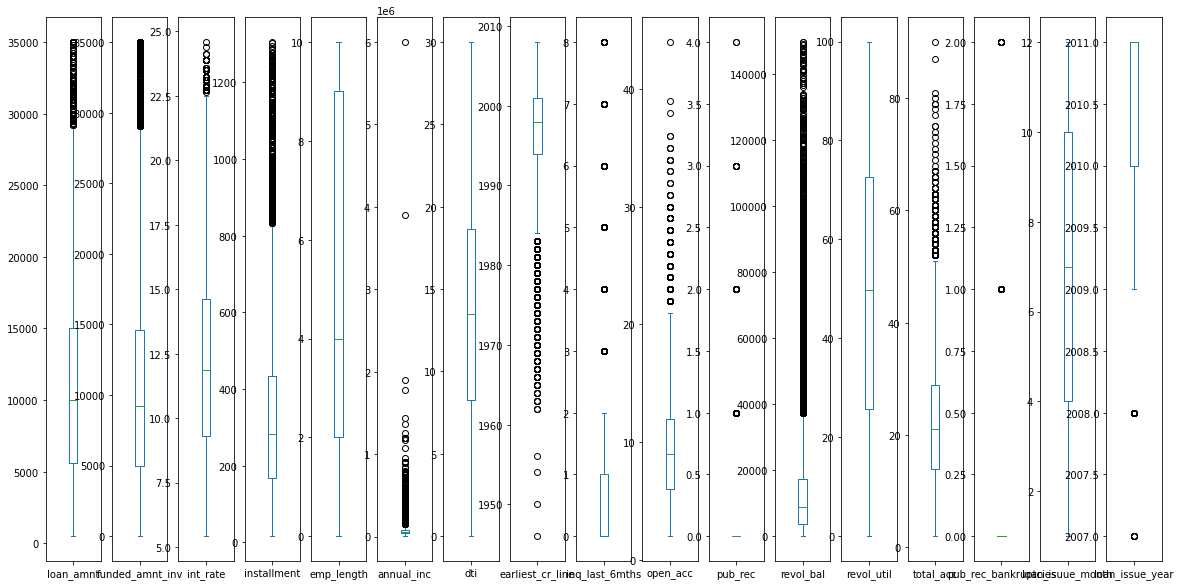

In [63]:
# Using Box Plot to find outliers if any
loan_2.plot(kind='box', subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

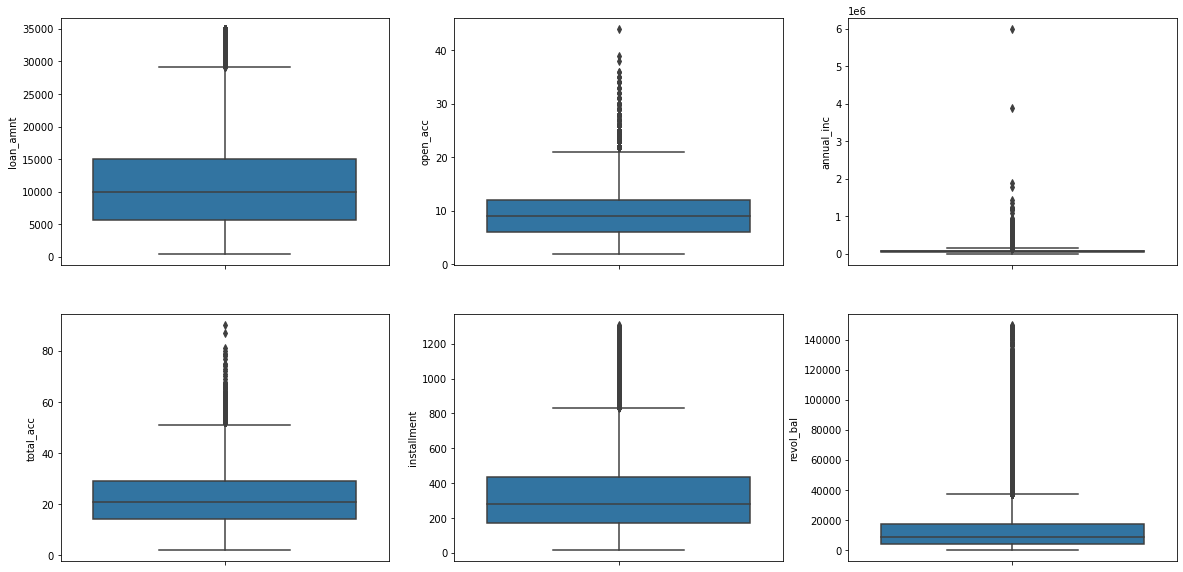

In [64]:
f, ax = plt.subplots(2,3, figsize=(20,10))

sns.boxplot(y="loan_amnt", data=loan_2, ax = ax[0,0])
sns.boxplot(y="open_acc", data=loan_2, ax = ax[0,1])
sns.boxplot(y="annual_inc", data=loan_2, ax = ax[0,2])
sns.boxplot(y="total_acc", data=loan_2, ax = ax[1,0])
sns.boxplot(y="installment", data=loan_2, ax = ax[1,1])
sns.boxplot(y="revol_bal", data=loan_2, ax = ax[1,2])

In [65]:
#for annual_inc, the highest value is 6000000 where 75% quantile value is 83000.
# we need to remomve outliers from annual_inc i.e. 95 to 100%. This value is taken so as to delete very high values.
annual_inc_q = loan_2["annual_inc"].quantile(0.95)
loan_2 = loan_2[loan_2["annual_inc"] < annual_inc_q]

In [66]:
# for open_acc, the highest value is 44 where 75% quantile value is 12, and is 5 times the mean
# we need to remomve outliers from open_acc i.e. 95 to 100%
open_acc_q = loan_2["open_acc"].quantile(0.95)
loan_2 = loan_2[loan_2["open_acc"] < open_acc_q]


In [67]:
# for total_acc, the highest value is 90 where 75% quantile value is 29, and is 4 times the mean
# we need to remomve outliers from total_acc i.e. 95 to 100%
total_acc_q = loan_2["total_acc"].quantile(0.95)
loan_2 = loan_2[loan_2["total_acc"] < total_acc_q]

#### 14 **Creating Bins of Continuious Data**<a class="anchor" id="section14"></a>
- When continious data has a wide spread and large values it is beneficial to bin these values to enable better analysisi.
- Following data is binned for the purpose of this analysis
- Annual Income
- Loan Amount
- Installment
- Int range

In [68]:
# create bins for loan_amnt
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-38000']
loan_2['loan_amnt_range'] = pd.cut(loan_2['loan_amnt'], bins, labels=bucket_l)
# create bins for int_rate
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 - 25']
loan_2['int_rate_range'] = pd.cut(loan_2['int_rate'], bins, labels=bucket_l)

# create bins for annual_inc
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 - 1000000']
loan_2['annual_inc_range'] = pd.cut(loan_2['annual_inc'], bins, labels=bucket_l)

# create bins for installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

loan_2['installment_range'] = loan_2['installment'].apply(lambda x: installment(x))


### 15. **Analysing Each column for Discripencies**<a class="anchor" id="section15"></a>


### 15.1 Column Analysis<a class="anchor" id="section151"></a>
- In this section each colum is examined in terms of:
  - Numeric Cols
    - Describe
    - Value Counts
    - Distribution
    - Unique Values
  - Categorical Columns
    - Data types
    - Value counts
    - Unique Values
    

In [69]:
loan_2['loan_amnt']

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39562     4800
39573     7000
39623     9000
39666    15450
39680     3000
Name: loan_amnt, Length: 31733, dtype: int64

In [70]:
loan_2['funded_amnt_inv']

0        4,975.00
1        2,500.00
2        2,400.00
3       10,000.00
4        3,000.00
           ...   
39562    1,100.00
39573    1,000.00
39623      700.00
39666      600.00
39680      525.00
Name: funded_amnt_inv, Length: 31733, dtype: float64

In [71]:
loan_2['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39562     36 months
39573     36 months
39623     36 months
39666     36 months
39680     36 months
Name: term, Length: 31733, dtype: object

In [72]:
loan_2['installment']

0       162.87
1        59.83
2        84.33
3       339.31
4        67.79
         ...  
39562   155.52
39573   227.82
39623   301.04
39666   507.46
39680    99.44
Name: installment, Length: 31733, dtype: float64

In [73]:
loan_2.installment.describe()

count   31,733.00
mean       309.72
std        196.16
min         16.08
25%        163.08
50%        269.23
75%        405.61
max      1,305.19
Name: installment, dtype: float64

In [74]:
loan_2['grade'].value_counts()

B    9719
A    8060
C    6534
D    4261
E    2185
F     753
G     221
Name: grade, dtype: int64

In [75]:
loan_2['sub_grade'].value_counts()

A4    2368
B3    2349
B5    2206
A5    2191
B4    2027
C1    1728
B2    1668
C2    1622
B1    1469
A3    1437
C3    1238
A2    1185
D2    1093
C4     995
C5     951
D3     944
A1     879
D4     790
D1     757
D5     677
E1     613
E2     506
E3     421
E4     351
E5     294
F1     238
F2     182
F3     131
F4     122
F5      80
G1      71
G2      58
G3      40
G4      35
G5      17
Name: sub_grade, dtype: int64

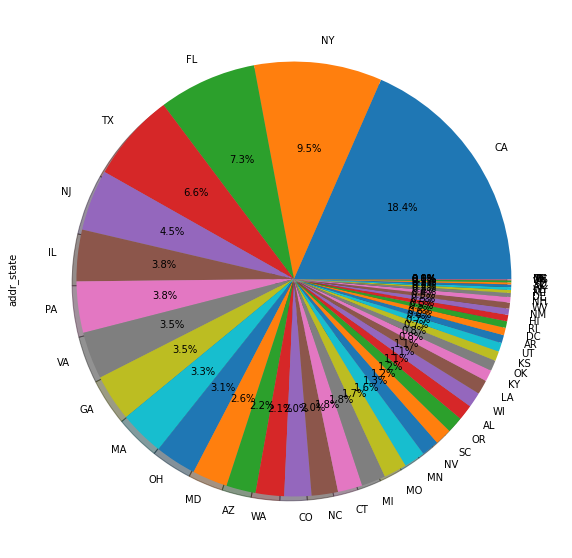

In [76]:
plt.figure(figsize=(14, 10))
loan_2['addr_state'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

In [77]:
loan_2['home_ownership'].value_counts()

RENT        16323
MORTGAGE    12982
OWN          2345
OTHER          83
Name: home_ownership, dtype: int64

In [78]:
loan_2['annual_inc'].describe()

count    31,733.00
mean     59,835.09
std      27,155.37
min       4,000.00
25%      40,000.00
50%      55,000.00
75%      75,000.00
max     143,500.00
Name: annual_inc, dtype: float64

In [79]:
loan_2['verification_status'].value_counts()

Not Verified       13791
Verified            9636
Source Verified     8306
Name: verification_status, dtype: int64

In [80]:
loan_2['loan_status'].value_counts()

Fully Paid     26426
Charged Off     4413
Current          894
Name: loan_status, dtype: int64

In [81]:
# Form the pre assignment session it is clear that data with loan status as current do not offer any insight to th eanalysis
# Hence deleting rows with loan status as current
loan_2 = loan_2.drop(loan_2.loc[loan_2['loan_status']=='Current'].index)

In [82]:
loan_2['purpose'].value_counts()

debt_consolidation    14478
credit_card            3998
other                  3142
home_improvement       2106
major_purchase         1776
small_business         1381
car                    1237
wedding                 797
medical                 545
moving                  479
vacation                288
house                   287
educational             251
renewable_energy         74
Name: purpose, dtype: int64

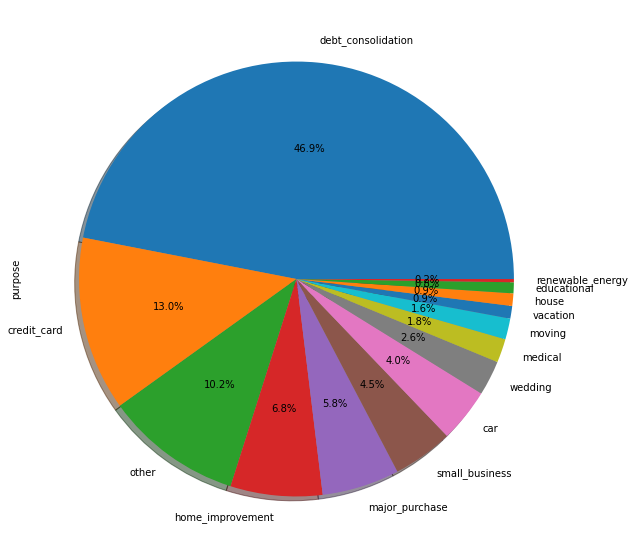

In [83]:
plt.figure(figsize=(14, 10))
loan_2['purpose'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

In [84]:
loan_2['dti'].describe()

count   30,839.00
mean        13.16
std          6.64
min          0.00
25%          8.03
50%         13.23
75%         18.34
max         29.99
Name: dti, dtype: float64

In [85]:
loan_2['inq_last_6mths'].value_counts()

0    15463
1     8437
2     4353
3     2205
4      214
5       97
6       43
7       21
8        6
Name: inq_last_6mths, dtype: int64

In [86]:
loan_2['open_acc'].value_counts()

7     3537
6     3506
8     3416
9     3162
5     2831
10    2642
11    2220
4     2104
12    1775
13    1415
3     1338
14    1051
15     770
16     568
2      504
Name: open_acc, dtype: int64

In [87]:
loan_2['pub_rec'].value_counts()

0    29162
1     1631
2       39
3        5
4        2
Name: pub_rec, dtype: int64

In [88]:
loan_2['revol_bal'].describe()


count    30,839.00
mean     11,591.59
std      13,046.47
min           0.00
25%       3,364.00
50%       8,032.00
75%      15,172.50
max     149,000.00
Name: revol_bal, dtype: float64

In [89]:
loan_2['revol_util']


0       83.70
1        9.40
2       98.50
3       21.00
5       28.30
         ... 
39562   68.70
39573   79.00
39623   62.90
39666   34.30
39680   70.90
Name: revol_util, Length: 30839, dtype: float64

### 15.2 **Distribution of Data**<a class="anchor" id="section152"></a>
- Distribution is checked to see the nature of distribution, basic nature, its spread and uniformity

### 15.2.1 Data Distribution Part - I<a class="anchor" id="section1521"></a>

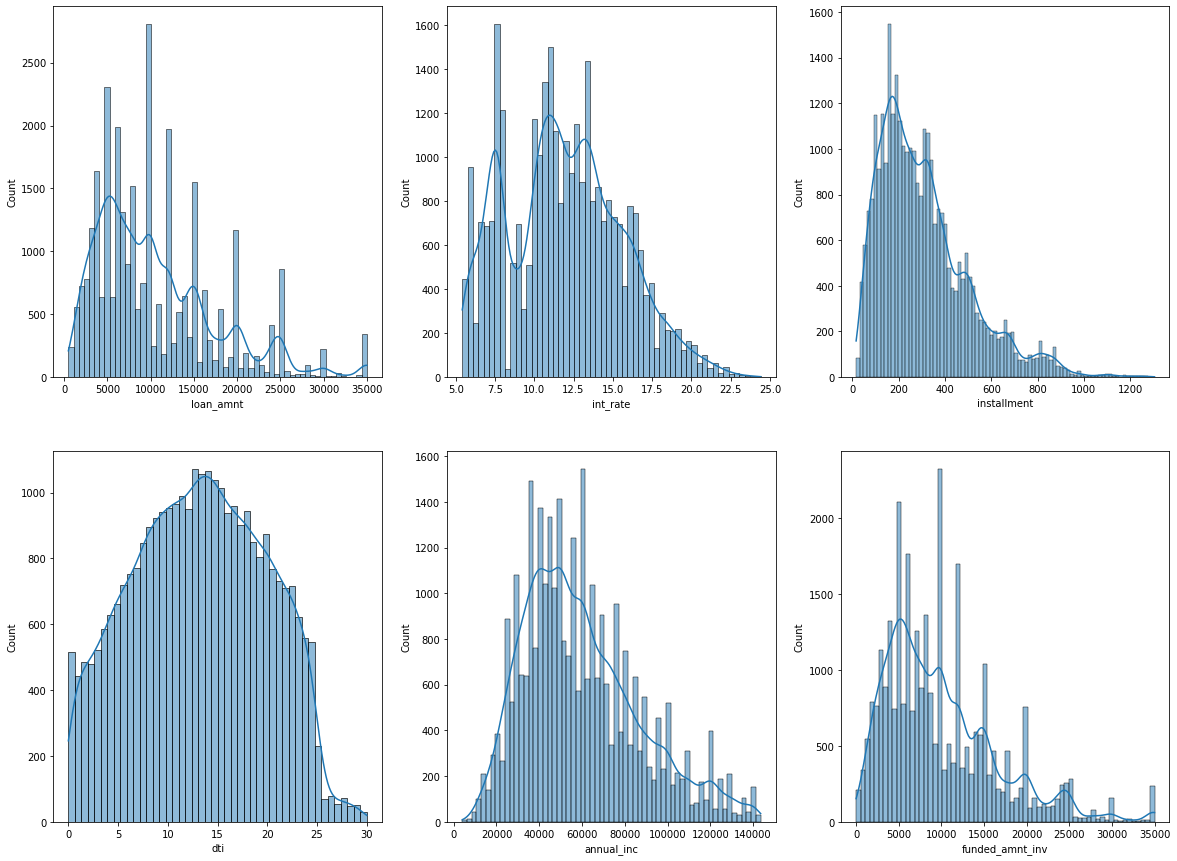

In [90]:
f, ax = plt.subplots(2,3, figsize=(20,15))

sns.histplot(data=loan_2, x="loan_amnt", palette ='rainbow', kde=True, ax=ax[0,0])
sns.histplot(data=loan_2, x="dti", palette ='rainbow', kde=True, ax=ax[1,0])
sns.histplot(data=loan_2, x="int_rate", palette ='rainbow', kde=True, ax=ax[0,1])
sns.histplot(data=loan_2, x="annual_inc", palette ='rainbow', kde=True, ax=ax[1,1])
sns.histplot(data=loan_2, x="installment", palette ='rainbow', kde=True, ax=ax[0,2])
sns.histplot(data=loan_2, x="funded_amnt_inv", palette ='rainbow', kde=True, ax=ax[1,2])


plt.show()

#### Observations
- **Loan amount**
  - Max number of loans are in the range of 10000 and dips down towards 35000.
  - Spikes as expected can be seen in rounded figures of 10,000 and 5000's.
  - The distribution is non uniform with heavy right skew.
- **Interest Rate**
  - Definite spikes around 6% and 10 % is visible.
  - Higher interst rates are probably for riskier loans
  - Some of the rates between 6 and 10% could be for specific customers and higher loans.
  - Distribution is roughtly uniform with a slight right skew.
- **Installments**
  - Installment gernerally follow the trend of loan amount.
  - Peak is seen in the viscinity of 200
  - Spikes in installments seems to be commensurate with both interest rates and loan amount.
- **Debt to Income Ration**
 - Peaks between 10 to 15%
 - See a trend of sharp increase and then sharp decrease around the peak.
- **Annual Income**
  - The distribution is near uniform.
  - People with higher income are less likely to apply for loans and hence their count will be reduced
  - As seen, its the middle income group who have both desire and capability for loans for improving the lifestyle.
- **Investor Funded Amount**
  - Its seen that investors mostly fund lesser value loans
  - Higher value loans in somes cases for particular applicant could also be funded by investors.




### 15.2.2 Data Distribution Part - II<a class="anchor" id="section1522"></a>

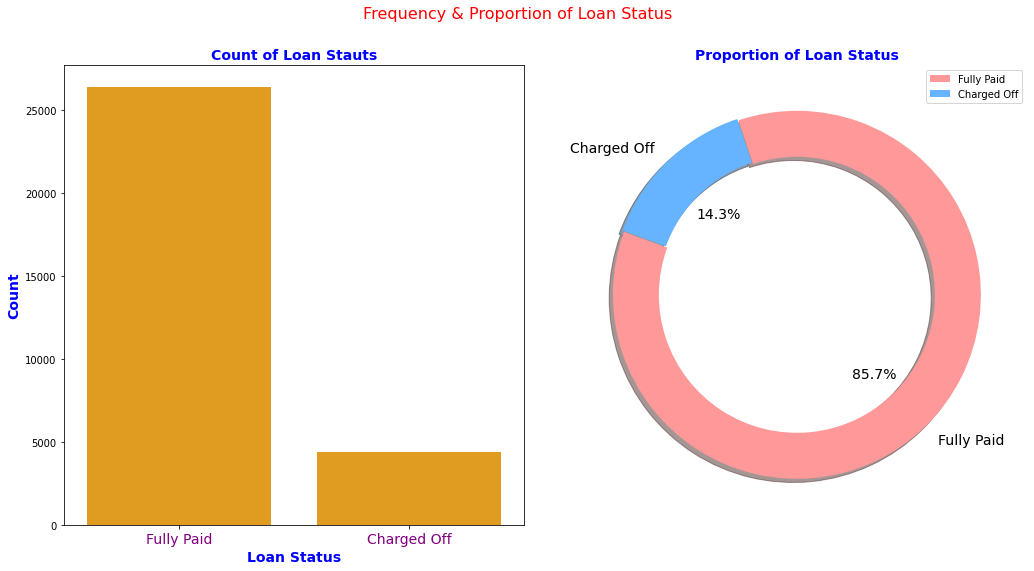

In [91]:
# Count plot and doughnut plot are used to show distribution of species in data set
fig, ax = plt.subplots(1,2, figsize = [15, 8])

space = [0.0,0.01]
colors = ['#ff9999','#66b3ff','#99ff99']

sns.countplot(x = 'loan_status', data = loan_2, ax=ax[0],color='orange')
loan_2['loan_status'].value_counts().plot(kind = 'pie', ax=ax[1], explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.25), 
                                      shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors=colors)
plt.legend(loan_2.loan_status)

plt.suptitle(t = 'Frequency & Proportion of Loan Status', color='red', y = 1.02, size = 16)

ax[0].set_xlabel(xlabel = 'Loan Status', size = 14, fontweight = 'bold', fontsize = 14, color = 'blue')
ax[0].set_ylabel(ylabel = 'Count', size = 14, fontweight = 'bold', fontsize = 14, color = 'blue')
ax[0].set_title(label = 'Count of Loan Stauts', size = 14, fontweight = 'bold', fontsize = 14, color = 'blue')
ax[0].tick_params(axis="x", labelsize=14, labelcolor="purple", rotation = 0)
space = [0.0,0.05,0.05]

ax[1].set_title(label = 'Proportion of Loan Status', size = 14, fontweight = 'bold', fontsize = 14, color = 'blue')
ax[1].set_ylabel('', size = 14)
plt.tight_layout(pad = 3.0)

plt.show()

#### Observation
- Only 14.2 % of the loans had to be charged off.
- However, depending upon the value of the loans, the NPA can be very high or bearable.

### 15.2.3 Data Distribution Part - III<a class="anchor" id="section1523"></a>

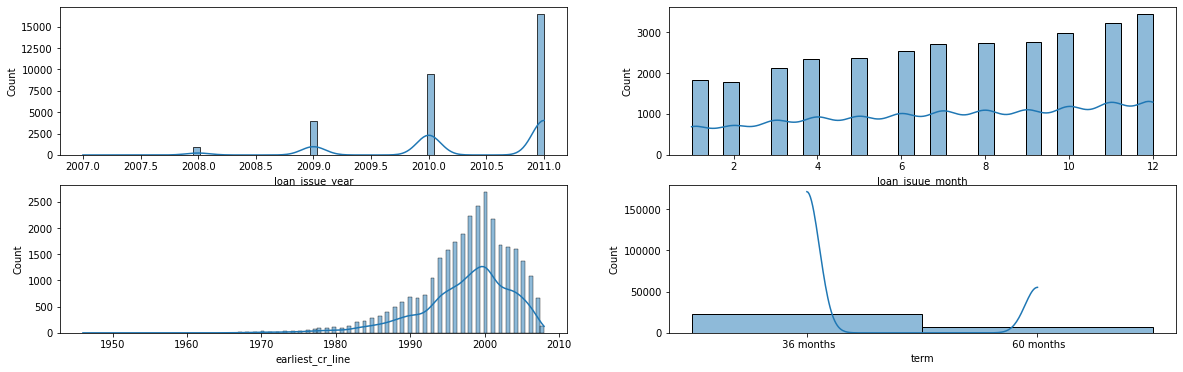

In [92]:
# Univariate analysis of dates and timelines
f, ax = plt.subplots(2,2, figsize=(20,6))

sns.histplot(data=loan_2, x="loan_issue_year", palette ='rainbow', kde=True, ax=ax[0,0])
sns.histplot(data=loan_2, x="loan_isuue_month", palette ='rainbow', kde=True, ax=ax[0,1])
sns.histplot(data=loan_2, x="earliest_cr_line", palette ='rainbow', kde=True, ax=ax[1,0])
sns.histplot(data=loan_2, x="term", palette ='rainbow', kde=True, ax=ax[1,1])

plt.show()

**Observations**
- Preffered loan term is 36 months
- Loans charged off are almost similar for loan terms
- B grade has the highest no of loans.
- A Grade lons have the least no of charged off loans in comparison to total loans
- Maximmum loans are taken for debt consolidation followed by credit cards payment
- Max loans charged off are for debt consolidation.

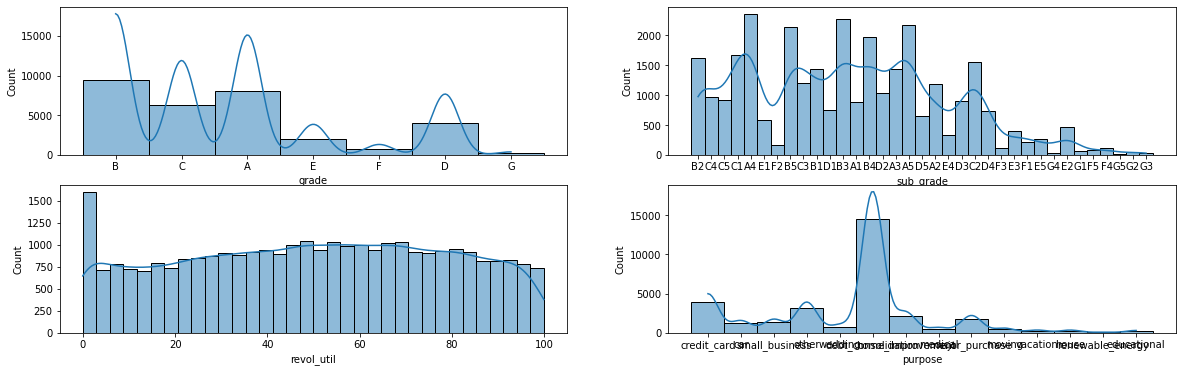

In [93]:
# Univariate analysis of dates and timelines
f, ax = plt.subplots(2,2, figsize=(20,6))

sns.histplot(data=loan_2, x="grade", palette ='rainbow', kde=True, ax=ax[0,0])
sns.histplot(data=loan_2, x="sub_grade", palette ='rainbow', kde=True, ax=ax[0,1])
sns.histplot(data=loan_2, x="revol_util", palette ='rainbow', kde=True, ax=ax[1,0])
sns.histplot(data=loan_2, x="purpose", palette ='rainbow', kde=True, ax=ax[1,1])

plt.show()

**Observations**
- **Year of loan issue**
  - There has is a steady increase in the number of applicants per year.
  - Its almost doubling evey year
- **Month of Loan Issue**
  - Loan issue seems to increase every month from Jan to Dec
  - Probably to meet yearly goals and targets.
- **Earliest Credit Line**
  - Post 1980 there has been a steay increase untill 2000.
  - There has been a sharp decline in the first time loan seekers since 2000


### 16 **Univariate Analysis**<a class="anchor" id="section16"></a>
- Univariate analyisis is carried out aganist a single parameter.
- Since the business objective is to determine factors affecting defaluted loans, the varables will be seen aganist defaulter percentage.
- This will enable us to see if the impact of variables on the default status.
- The degree of impact will decide if the variable is useful in predicting the impact on loan defalts.

In [94]:
# Encoding labels as numeric values to enable plotting.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
loan_2['loan_status']= label_encoder.fit_transform(loan_2['loan_status'].astype('str'))

### 16.1 Analysis of Variables aganist Status of Loan<a class="anchor" id="section161"></a>
- Use bar charts 
- Visualise how loan status varry with parameter

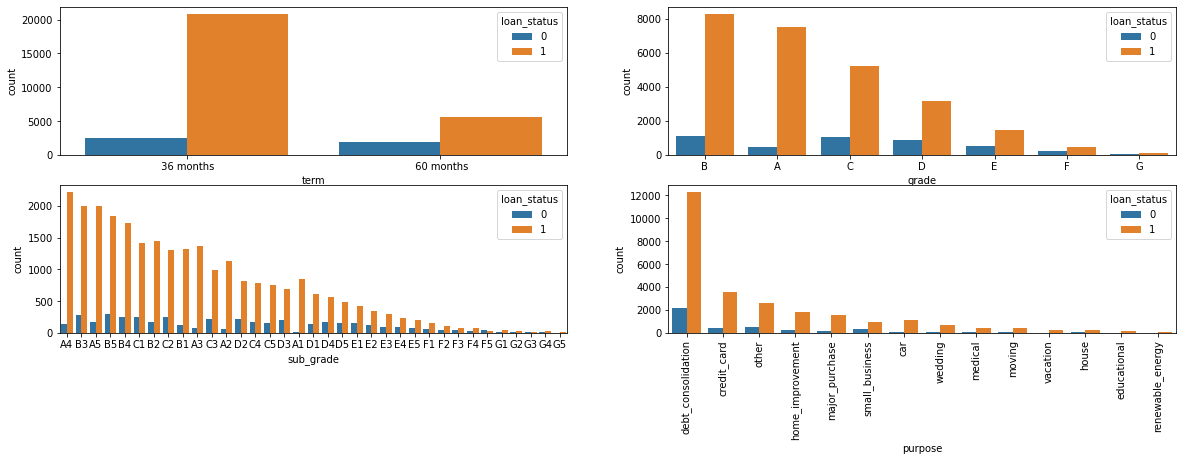

In [95]:
f, ax = plt.subplots(2,2, figsize=(20,6))
sns.countplot(x = 'term', data = loan_2, ax = ax[0,0], order = loan_2['term'].value_counts().index,hue='loan_status')
sns.countplot(x = 'grade', data = loan_2, ax = ax[0,1], order = loan_2['grade'].value_counts().index,hue='loan_status')
sns.countplot(x = 'sub_grade', data = loan_2, ax = ax[1,0],order = loan_2['sub_grade'].value_counts().index, hue='loan_status')
sns.countplot(x = 'purpose', data = loan_2, ax = ax[1,1],order = loan_2['purpose'].value_counts().index, hue='loan_status')
plt.xticks(rotation=90)
plt.show()

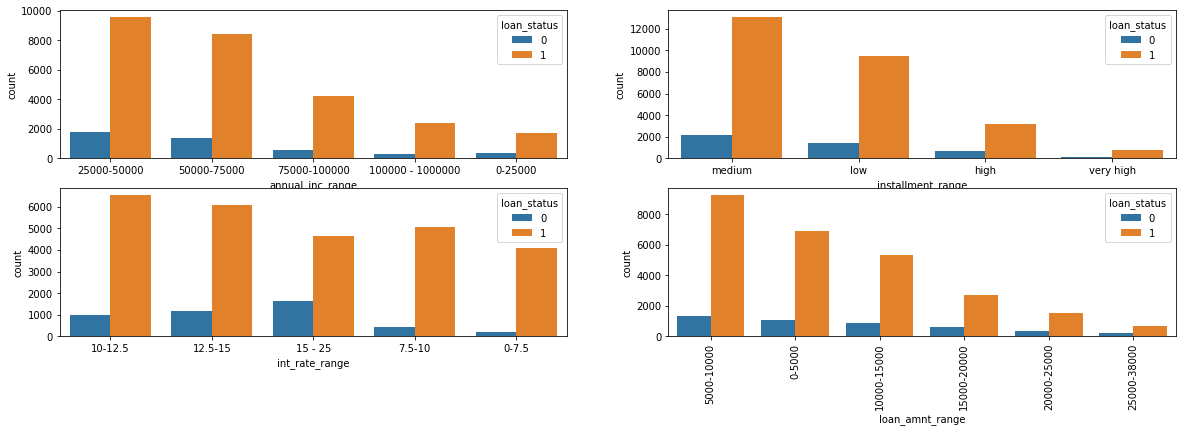

In [96]:
f, ax = plt.subplots(2,2, figsize=(20,6))
sns.countplot(x = 'annual_inc_range', data = loan_2, ax = ax[0,0], order = loan_2['annual_inc_range'].value_counts().index,hue='loan_status')

sns.countplot(x = 'installment_range', data = loan_2, ax = ax[0,1], order = loan_2['installment_range'].value_counts().index,hue='loan_status')

sns.countplot(x = 'int_rate_range', data = loan_2, ax = ax[1,0],order = loan_2['int_rate_range'].value_counts().index, hue='loan_status')

sns.countplot(x = 'loan_amnt_range', data = loan_2, ax = ax[1,1],order = loan_2['loan_amnt_range'].value_counts().index, hue='loan_status')
plt.xticks(rotation=90)

plt.show()

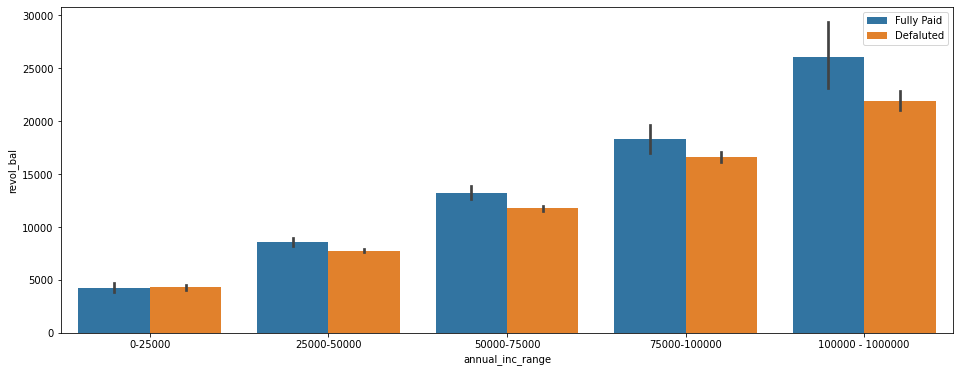

In [97]:
plt.figure(figsize=(16,6))
sns.barplot(y = 'revol_bal', x='annual_inc_range', hue ="loan_status",data=loan_2)

L=plt.legend()
L.get_texts()[0].set_text('Fully Paid')
L.get_texts()[1].set_text('Defaluted')

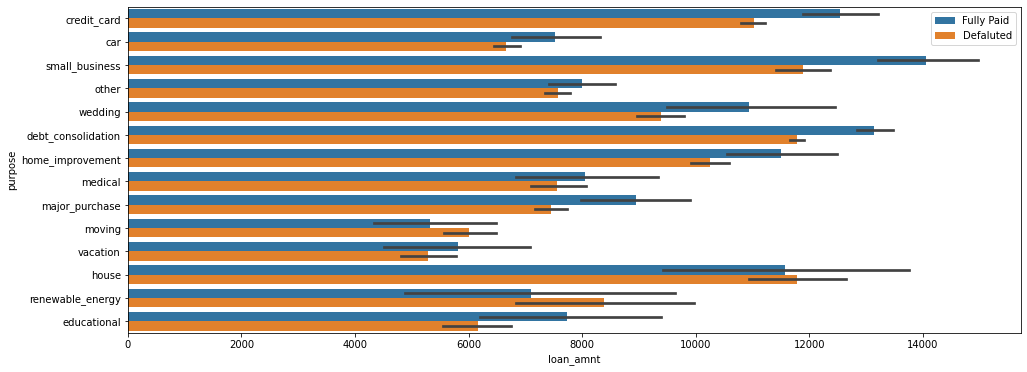

In [98]:
plt.figure(figsize=(16,6))
sns.barplot(x='loan_amnt', y='purpose', hue ="loan_status",data=loan_2)

L=plt.legend()
L.get_texts()[0].set_text('Fully Paid')
L.get_texts()[1].set_text('Defaluted')

### 16.2 Univariate analysis Agansit percentage of Loan Defaluts<a class="anchor" id="section162"></a>
- Use custom fuction "univariate_bar_plot"
- Y axis shows the percentage of defaults

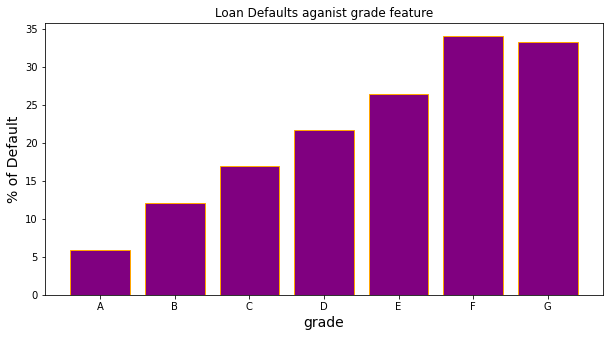

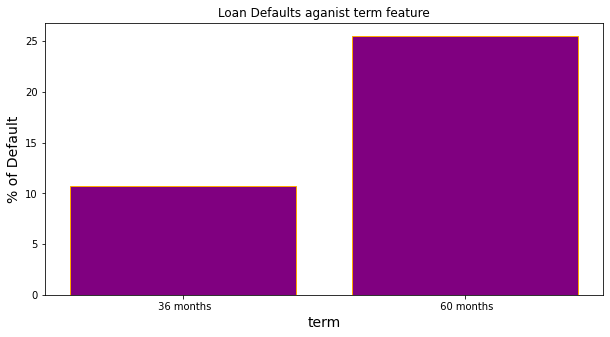

In [99]:
univariate_bar_plot_1('grade',loan_2)
univariate_bar_plot_1('term',loan_2)

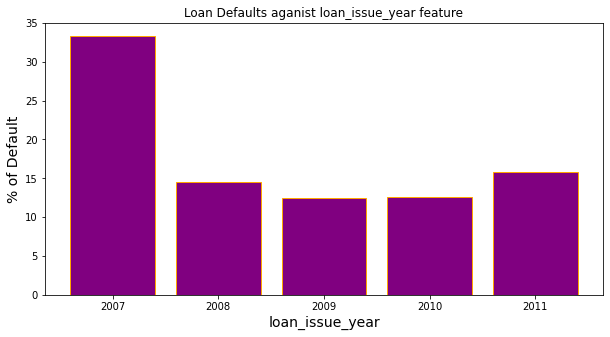

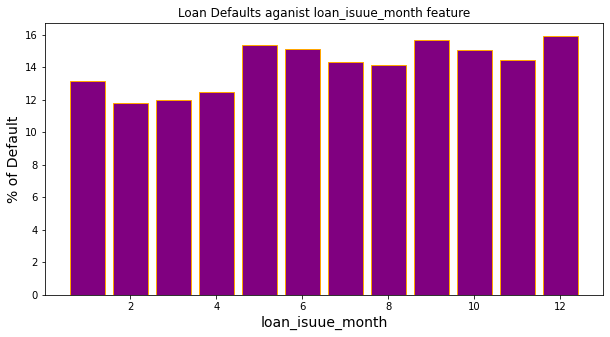

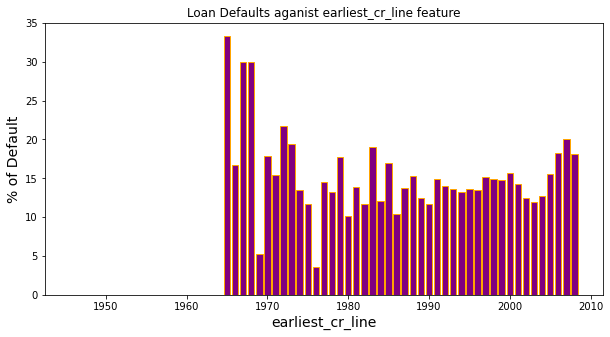

In [101]:

univariate_bar_plot_1('loan_issue_year', loan_2)
univariate_bar_plot_1('loan_isuue_month',loan_2)
univariate_bar_plot_1('earliest_cr_line',loan_2)
plt.show()


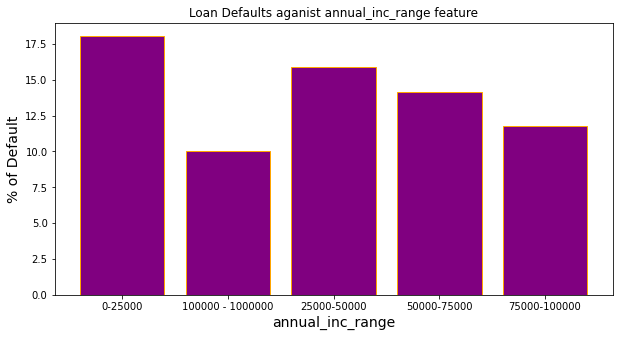

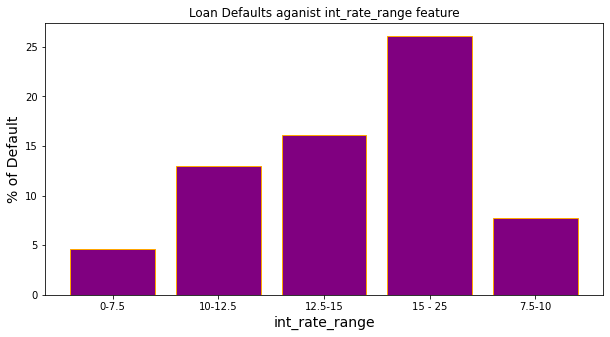

In [102]:
univariate_bar_plot_1('annual_inc_range',loan_2)
univariate_bar_plot_1('int_rate_range',loan_2)

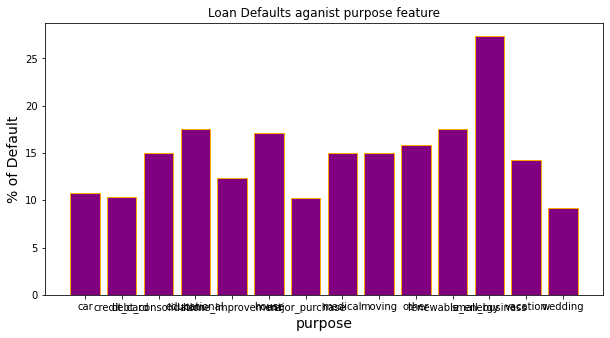

In [103]:
univariate_bar_plot_1('purpose', loan_2)

**Observation**
- Form the above analysis we can see that following features are of importance
  - Interest rate
  - Term
  - Purpose
  - Annual Income
  - Grade

### 17 **Bivariate Analysis**<a class="anchor" id="section17"></a>
- Two variables are analysed aganist each other to see how they effect each other.
- Enables to see degree of impact of one variable on another
- This is useful in customising loan products and adjusting variables like interst rates with respect to purpose, loan amount and grade

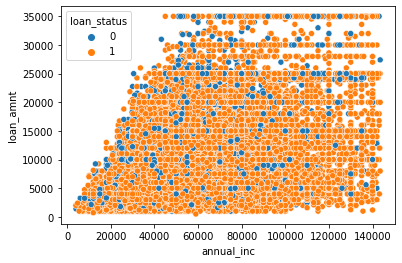

In [104]:
sns.scatterplot(x='annual_inc', y='loan_amnt', hue="loan_status", data=loan_2)

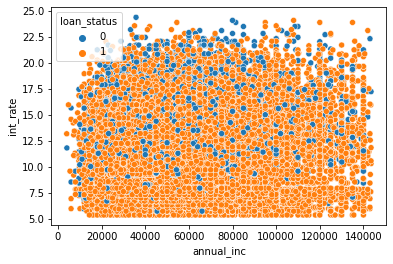

In [105]:
sns.scatterplot(x='annual_inc', y='int_rate', hue="loan_status", data=loan_2)

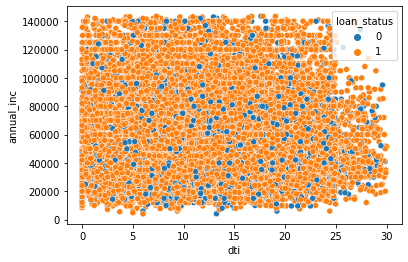

In [106]:
sns.scatterplot(x='dti', y='annual_inc', hue="loan_status", data=loan_2)

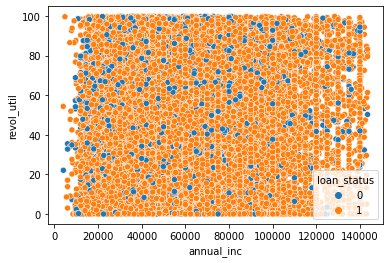

In [107]:
sns.scatterplot(x='annual_inc', y='revol_util', hue="loan_status", data=loan_2)

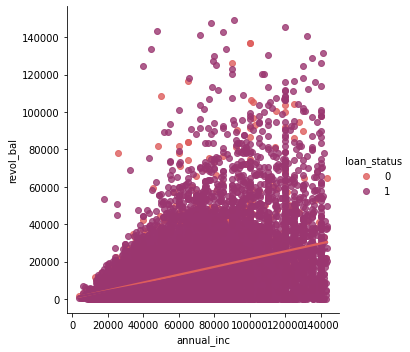

In [108]:
sns.lmplot(x='annual_inc', y= 'revol_bal', data= loan_2,hue='loan_status', palette='flare');

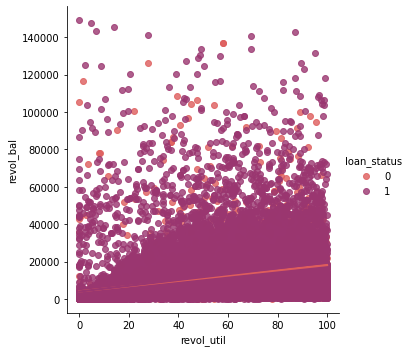

In [114]:
sns.lmplot(x='revol_util', y= 'revol_bal', data= loan_2,hue='loan_status', palette='flare');

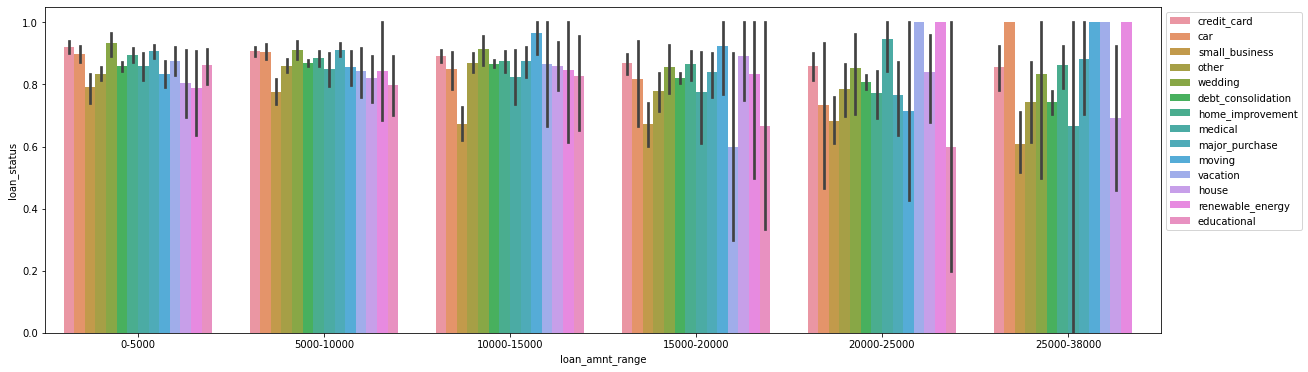

In [109]:
plt.figure(figsize=(20,6))

sns.barplot(x = 'loan_amnt_range', y='loan_status', hue ='purpose',data=loan_2)
plt.legend(bbox_to_anchor =(1,1))

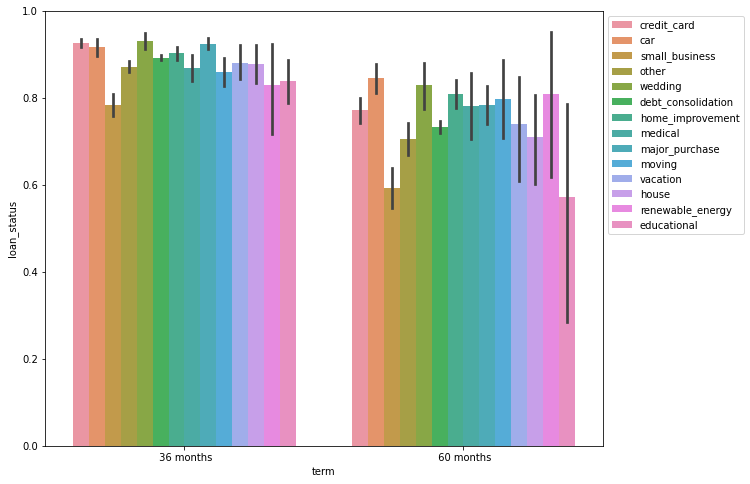

In [110]:
plt.figure(figsize=(10,8))
sns.barplot(x='term', y='loan_status', hue='purpose', data=loan_2)
plt.legend(bbox_to_anchor =(1,1))

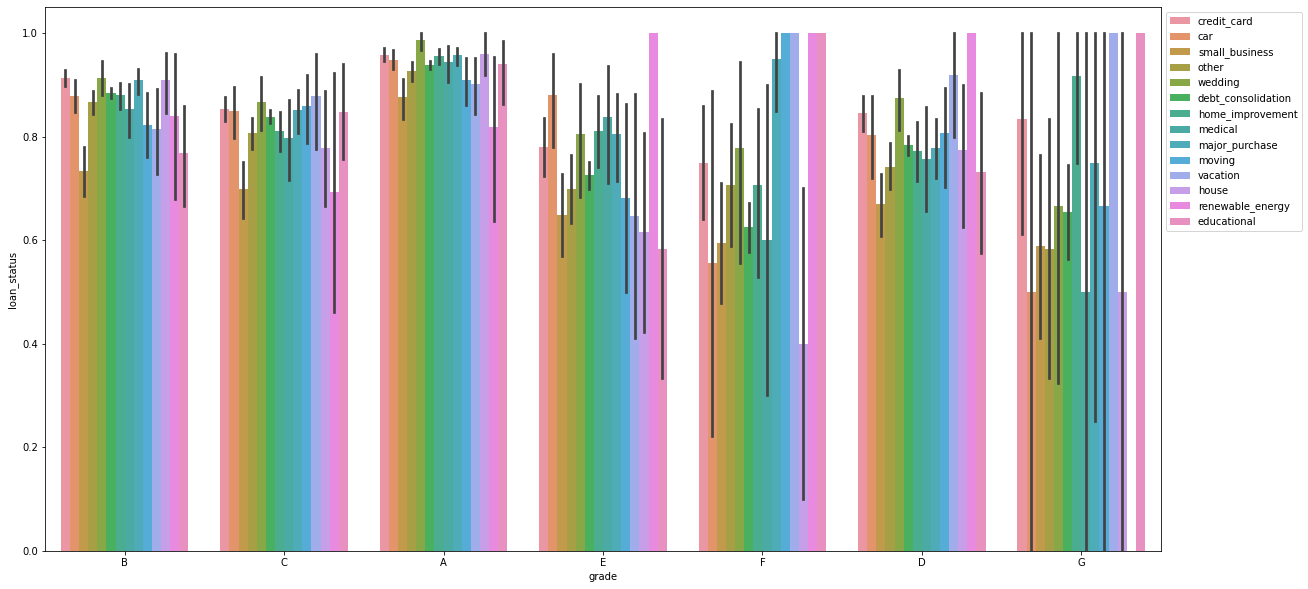

In [111]:
plt.figure(figsize=(20,10))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=loan_2)
plt.legend(bbox_to_anchor =(1,1))

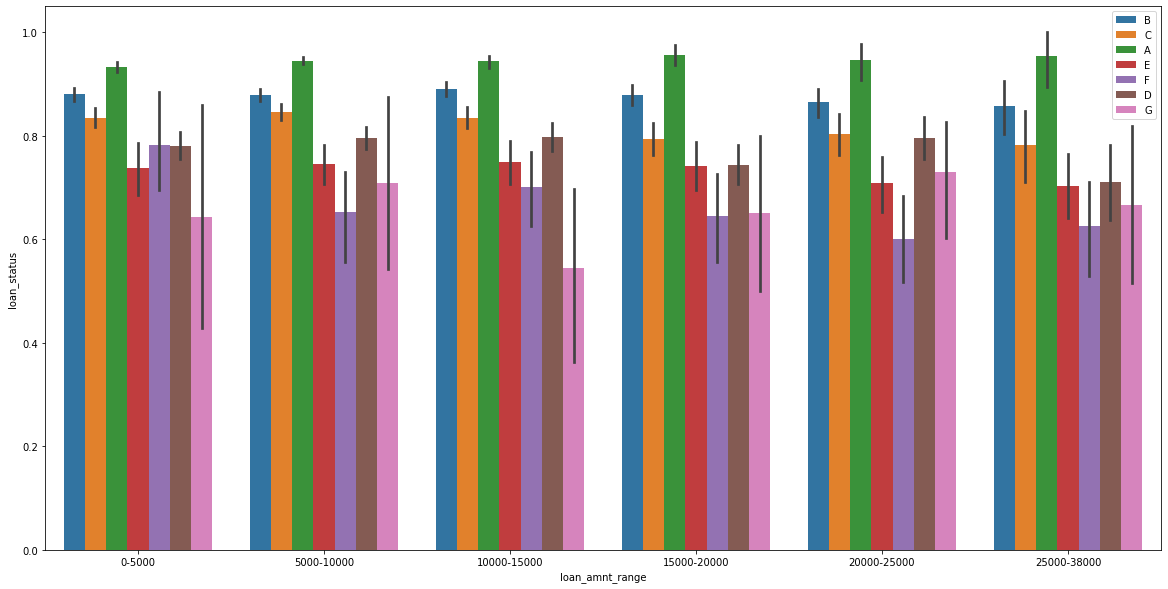

In [112]:
plt.figure(figsize=(20,10))
sns.barplot(x='loan_amnt_range', y='loan_status', hue='grade', data=loan_2)
plt.legend(bbox_to_anchor =(1,1))

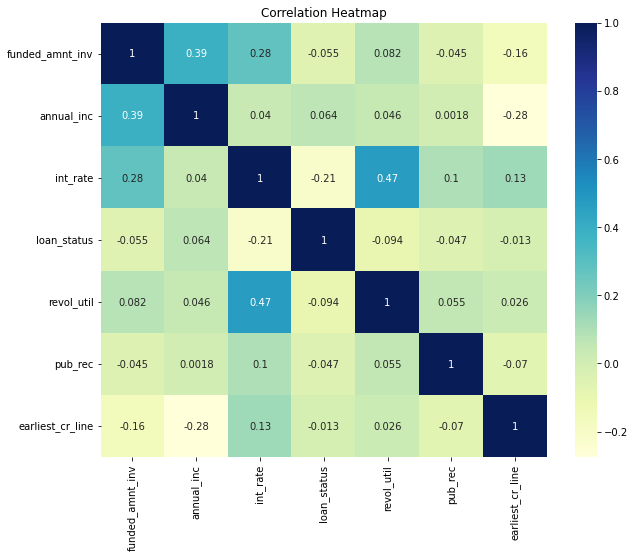

In [113]:
# plot heat map to see correlation between features
plt.figure(figsize=(10,8))
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = loan_2[continuous_f].corr()
sns.heatmap(loan_corr,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

#### **Observartions**
- Once more we can clearly see that following are the important variables
  - Annual Income
  - Interst Rate
  - Grade
  - Term
  - Purpose
  - Revolving Credit Utilsation
- Correlation of numeric variables
  - Annual income and loan amount is corelated.
  - Loan Status and interest rate have negative correlation
  - Annual income and investor funded loan has some positive correlation.
  - Interest rate and utilization of revolving credit has some positive corelation.


### 18. **Conclusion**<a class="anchor" id="section18"></a>










#### 18.1 Summary<a class="anchor" id="section181"></a>
- Though a large number of features were present in the initial data set, most of the data were redundnat and not good for the analysis.
- Cleaning fo the data and removing redudndat data brought the features by more than 50%

#### 18. 2 Recommendation<a class="anchor" id="section182"></a>
- The best driving features for the loan default analysis are: 
  - **Interest Rate** : Higher interest rare leads to more defaults
  - **Term** : Lower terms means larger installments and hence more chances of defaults, unless borrower is intrested in earlier payback.
  - **Grade** : Better the grade lower the chances of default
  - **Purpose** : Payment towards already exisiting debts are likely to end in default. 
  - **Revolving Credit Utilisation** : Higher utilisation of revoling credit may lead to defaults as the borrower's fianacial ablility to service the loan become lesser due to exisitng liabilities.
  - **Installment** : Higher the installment, more chances of default
  - **Annual Income** : Lower the income, chances of default are more. Also, see this in relation with existing credit because high income people with high liabilities can also be defaluters.


### 19 **Acknoledgement**<a class="anchor" id="section19"></a>
- I take this opportunity to thank the instructors, student buddy and councellors at UpGrad for their commitment and guidance.
- I thank the numeorus contributors whose work has cleared many doubts and lead to successful completion of this project.
- My family for their patience and support without which this would not have been possible
